In [1]:
#doing things with data
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle as w

In [2]:
# get the data
df = w.get_zillow()
df

csv file found and loaded


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [3]:
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [5]:
df.shape

(2152863, 7)

In [6]:
 df = df.rename(columns={'bedroomcnt': 'rooms'
                         , 'bathroomcnt': 'bath'
                         , 'calculatedfinishedsquarefeet': 'sqft'
                         , 'taxvaluedollarcnt':'taxvalue'
                         ,'yearbuilt': 'built'
                         , 'taxamount':'tax'})
df

,rooms,bath,sqft,taxvalue,built,tax,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [7]:
# 6037 = LA county, California 6039 = Orange county, California 6111 = Ventura county, California
df.fips.value_counts()

6037.0    1431811
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [9]:
df.fips = df['fips'].replace(['6037.0', '6059.0', '6111.0'],['LA','Orange','Ventura']).astype(str)
df

,rooms,bath,sqft,taxvalue,built,tax,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,LA
1,0.0,0.0,NaN,10.0,NaN,NaN,LA
2,0.0,0.0,NaN,10.0,NaN,NaN,LA
3,0.0,0.0,NaN,2108.0,NaN,174.21,LA
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,Orange
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange


In [10]:
df.isnull().sum()

rooms         11
bath          11
sqft        8484
taxvalue     493
built       9337
tax         4442
fips           0
dtype: int64

In [11]:
# I've decided to drop all nulls, there are over 2 million listings and dropping a few thousand will not dramatically affect the outcome of our study
#drop all my nulls in the df
df = df.dropna()
df

,rooms,bath,sqft,taxvalue,built,tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,LA
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange


In [12]:
df.isnull().sum()

rooms       0
bath        0
sqft        0
taxvalue    0
built       0
tax         0
fips        0
dtype: int64

In [13]:
#move my target variable taxvalue to the 1st column in the dataframe
column_to_move = df.pop("taxvalue")
df.insert(0, "taxvalue", column_to_move)
df

,taxvalue,rooms,bath,sqft,built,tax,fips
4,296425.0,4.0,2.0,3633.0,2005.0,6941.39,LA
6,847770.0,3.0,4.0,1620.0,2011.0,10244.94,LA
7,646760.0,3.0,2.0,2077.0,1926.0,7924.68,LA
11,5328.0,0.0,0.0,1200.0,1972.0,91.60,LA
14,6920.0,0.0,0.0,171.0,1973.0,255.17,LA
...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,13877.56,LA
2152858,960756.0,4.0,3.0,2262.0,2015.0,13494.52,Orange
2152859,536061.0,4.0,4.5,3127.0,2014.0,6244.16,Orange
2152861,424353.0,3.0,2.5,1974.0,2015.0,5302.70,Orange


# univariate visualization

In [14]:
df.taxvalue.value_counts()

450000.0    820
500000.0    774
400000.0    723
430000.0    690
440000.0    683
           ... 
729523.0      1
940139.0      1
545367.0      1
38804.0       1
536061.0      1
Name: taxvalue, Length: 588178, dtype: int64

# taxvalue visualization/outlier remedy

In [15]:
df.taxvalue.describe()

count    2.140235e+06
mean     4.606416e+05
std      6.771576e+05
min      2.200000e+01
25%      1.891660e+05
50%      3.282960e+05
75%      5.346060e+05
max      9.018846e+07
Name: taxvalue, dtype: float64

In [16]:
# addressed outliers in tax value, deleted everything over 2 million 
df = df[df.taxvalue <= 2000000]
df

,taxvalue,rooms,bath,sqft,built,tax,fips
4,296425.0,4.0,2.0,3633.0,2005.0,6941.39,LA
6,847770.0,3.0,4.0,1620.0,2011.0,10244.94,LA
7,646760.0,3.0,2.0,2077.0,1926.0,7924.68,LA
11,5328.0,0.0,0.0,1200.0,1972.0,91.60,LA
14,6920.0,0.0,0.0,171.0,1973.0,255.17,LA
...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,13877.56,LA
2152858,960756.0,4.0,3.0,2262.0,2015.0,13494.52,Orange
2152859,536061.0,4.0,4.5,3127.0,2014.0,6244.16,Orange
2152861,424353.0,3.0,2.5,1974.0,2015.0,5302.70,Orange


In [17]:
df.taxvalue.describe()

count    2.101226e+06
mean     4.003087e+05
std      3.160778e+05
min      2.200000e+01
25%      1.863940e+05
50%      3.229225e+05
75%      5.180000e+05
max      2.000000e+06
Name: taxvalue, dtype: float64

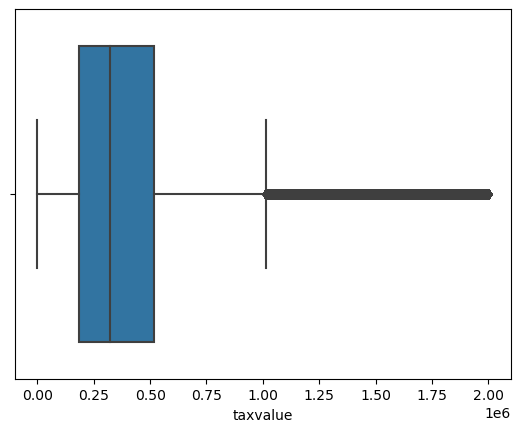

In [18]:
sns.boxplot(x=df.taxvalue)
plt.show()

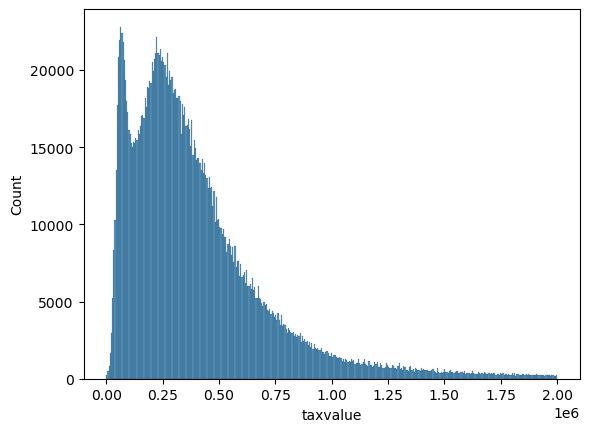

In [19]:
sns.histplot(df.taxvalue)
plt.show()

# visualize sqft/outlier remedy

In [20]:
df = df[df.sqft <= 5000]
df

,taxvalue,rooms,bath,sqft,built,tax,fips
4,296425.0,4.0,2.0,3633.0,2005.0,6941.39,LA
6,847770.0,3.0,4.0,1620.0,2011.0,10244.94,LA
7,646760.0,3.0,2.0,2077.0,1926.0,7924.68,LA
11,5328.0,0.0,0.0,1200.0,1972.0,91.60,LA
14,6920.0,0.0,0.0,171.0,1973.0,255.17,LA
...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,13877.56,LA
2152858,960756.0,4.0,3.0,2262.0,2015.0,13494.52,Orange
2152859,536061.0,4.0,4.5,3127.0,2014.0,6244.16,Orange
2152861,424353.0,3.0,2.5,1974.0,2015.0,5302.70,Orange


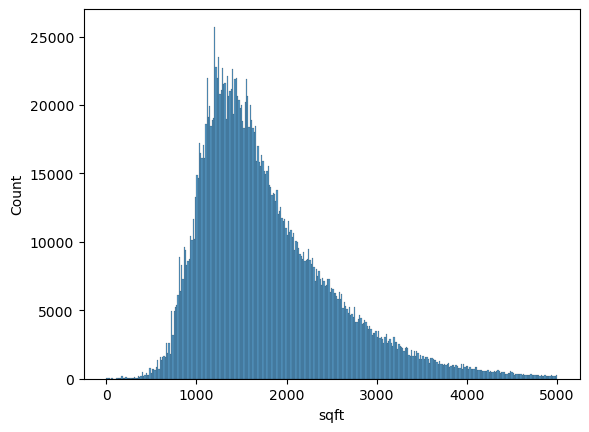

In [21]:
sns.histplot(x=df.sqft)
plt.show()

# rooms visualization

In [22]:
df.rooms.value_counts()

3.0     955505
4.0     618542
2.0     332515
5.0     133567
1.0      22738
6.0      18540
0.0       4184
7.0       2803
8.0        460
9.0        101
10.0        41
11.0         8
14.0         2
12.0         2
15.0         1
16.0         1
13.0         1
Name: rooms, dtype: int64

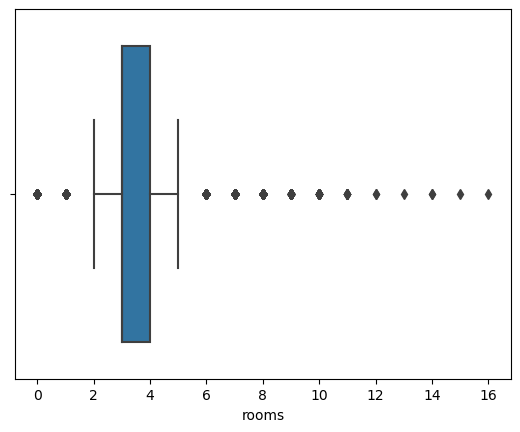

In [23]:
sns.boxplot(x=df.rooms)
plt.show()


In [24]:
df.rooms.value_counts()

3.0     955505
4.0     618542
2.0     332515
5.0     133567
1.0      22738
6.0      18540
0.0       4184
7.0       2803
8.0        460
9.0        101
10.0        41
11.0         8
14.0         2
12.0         2
15.0         1
16.0         1
13.0         1
Name: rooms, dtype: int64

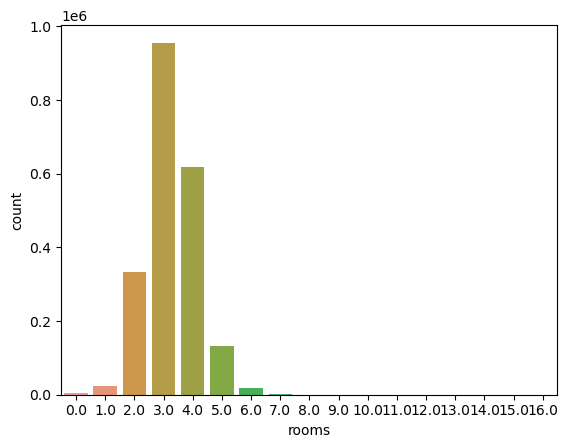

In [25]:
sns.countplot(x=df.rooms)
plt.show()

# Visualize bathrooms

In [26]:
df.bath.value_counts()

2.00     940429
3.00     417069
1.00     412094
2.50     142185
4.00      73995
1.50      31115
3.50      26619
5.00      18843
4.50      15815
0.00       4060
6.00       3426
5.50       2562
7.00        446
6.50        189
8.00         63
7.50         57
0.50         13
9.00         10
1.75          3
20.00         3
10.00         3
14.00         2
8.50          2
16.00         2
11.00         2
18.00         1
13.00         1
9.50          1
15.00         1
Name: bath, dtype: int64

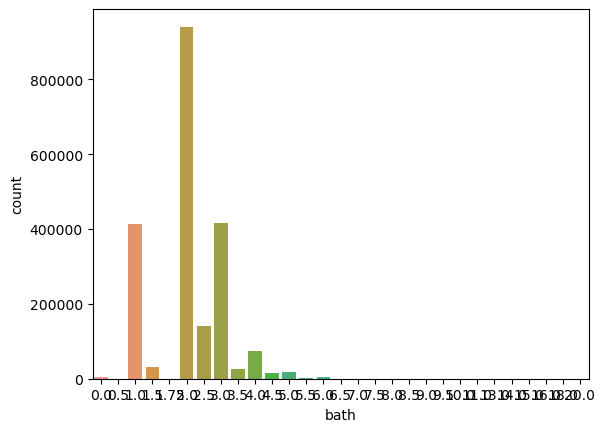

In [27]:
sns.countplot(x=df.bath)
plt.show()

# Visualize year built

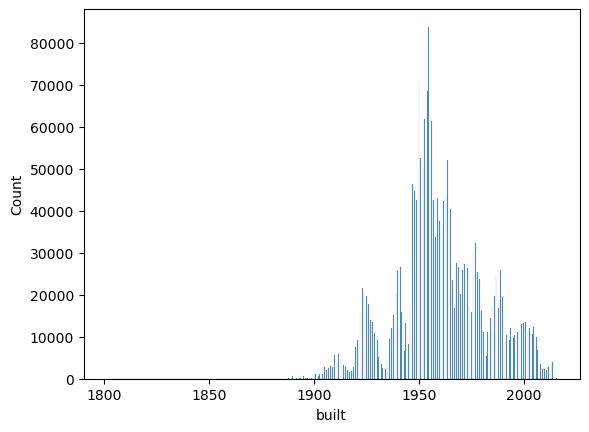

In [28]:
#visualize year built
sns.histplot(x=df.built)
plt.show()

# visualize taxes / outlier remedy

In [29]:
df = df[df.tax <= 30000]

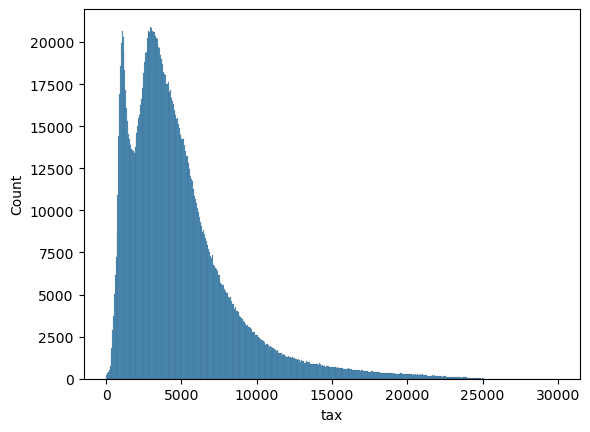

In [30]:
sns.histplot(x=df.tax)
plt.show()

# Visualize fips

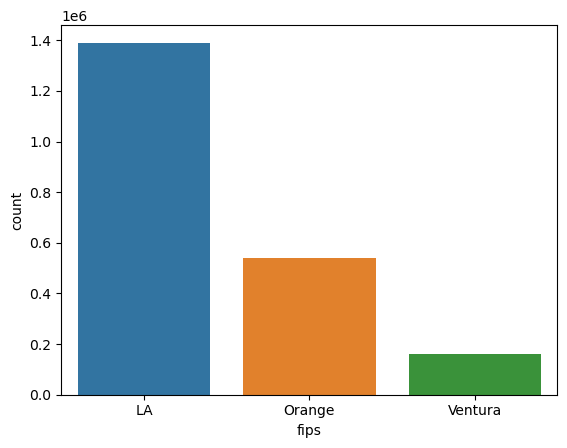

In [31]:
sns.countplot(x=df.fips)
plt.show()

In [ ]:
#plt.figure(figsize= (12, 4))
##enumerate gives us the index of what we are iterating over as well as the iteration of the df.columns
#for i, col in enumerate (df.columns[1:]):    
#    print(i, col)
#    plt.subplot(1, 7, i+1)
#    sns.histplot(df[col])
#    plt.show()
#plt. suptitle('Distribution of all my variables')
#plt.show()

# call function that gets and cleans data

In [32]:
w.wrangle_zillow()

csv file found and loaded


,taxvalue,bedrooms,bathroom,sqft,built,tax,fips
4,296425.0,4.0,2.0,3633.0,2005.0,6941.39,6037.0
6,847770.0,3.0,4.0,1620.0,2011.0,10244.94,6037.0
7,646760.0,3.0,2.0,2077.0,1926.0,7924.68,6037.0
11,5328.0,0.0,0.0,1200.0,1972.0,91.60,6037.0
14,6920.0,0.0,0.0,171.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,13877.56,6037.0
2152858,960756.0,4.0,3.0,2262.0,2015.0,13494.52,6059.0
2152859,536061.0,4.0,4.5,3127.0,2014.0,6244.16,6059.0
2152861,424353.0,3.0,2.5,1974.0,2015.0,5302.70,6059.0


In [ ]:
df

# Split into train, validate and test

In [ ]:
train, validate, test = w.split_data(df)
train